In [66]:
!pip install umap-learn --index-url=https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple --trusted-host=artifactory.alight.com

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple


In [269]:
import pandas as pd

In [270]:
import boto3
client=boto3.client('s3')
path1 = 's3://adl-core-sagemaker-studio/external/Deepali/data_for_tpm.csv'

In [271]:
data_for_tpm=pd.read_csv(path1)

In [272]:
# data_for_tpm.head()

In [273]:
data_for_tpm['input'] = data_for_tpm['input'].fillna('')

In [274]:
import bertopic
from bertopic import BERTopic
import umap.umap_ as umap
from umap import UMAP
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer

In [275]:
# topic_model = BERTopic(min_topic_size=300)
# topic_model_large = BERTopic("all-mpnet-base-v2")

In [277]:
umap_model = UMAP(random_state=42)
sentence_model = SentenceTransformer("sentence-transformers/all-MiniLM-L12-v2")
topic_model = BERTopic(umap_model=umap_model, nr_topics= 1500, embedding_model=sentence_model)

In [278]:
# topic_model.get_document_info(docs)

In [279]:
docs = data_for_tpm['input']

In [280]:
topics, probs = topic_model.fit_transform(docs)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [281]:
vectorizer_model = CountVectorizer(stop_words="english", ngram_range=(1, 3), min_df=10)
topic_model.update_topics(docs, vectorizer_model=vectorizer_model)

In [282]:
topic_prob_dict = dict()
for topic, prob in zip(topics,probs):
    topic_prob_dict[topic] = prob
#topic_prob_dict

In [283]:
df_input_topic_prob_response = pd.DataFrame()
# df_input_topic_prob_response.assign('input' = data_for_tpm['input'],
#                                     'response_text' = data_for_tpm['response_text'],
#                                    'topic' = topics, 'probability' = probs )
# df_input_topic_prob_response
df_input_topic_prob_response['input']  = data_for_tpm['input']
df_input_topic_prob_response['response_text'] = data_for_tpm['response_text'] 
df_input_topic_prob_response['topic'] = topics
df_input_topic_prob_response['prob'] = probs
df_input_topic_prob_response.head()

,input,response_text,topic,prob
0,I have no clue what I am doing,I'm not sure I understand. Please try rewordin...,909,0.638726
1,On the portal,I'm not sure I understand. Please try rewordin...,1295,0.879884
2,Are you kidding,I'm not sure I understand. Please try rewordin...,774,0.110141
3,I am just trying to complete the info asked fo...,I'm not sure I understand. Please try rewordin...,301,1.000000
4,How to Take Action,I'm not sure I understand. Please try rewordin...,411,0.933667


In [284]:
df_input_topic_prob_response.shape

(194069, 4)

In [285]:
# df_input_topicwise_prob_response = df_input_topic_prob_response.groupby(['topic', 'input'])['response_text']
# df_input_topicwise_prob_response = df_input_topic_prob_response.groupby(by= ["response_text"]).value_counts()

# df_input_topicwise_prob_response = df_input_topicwise_prob_response.groupby("response_text", group_keys=True)#.apply(lambda x: x)
# df_input_topicwise_prob_response = df_input_topic_prob_response.groupby(['topic','input','response_text'])
# df_input_topicwise_prob_response.head(1000)

In [286]:
# !pip install pandas_profiling --index-url=https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple --trusted-host=artifactory.alight.com

In [287]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df_input_topic_prob_response, title="tpm_Pandas_Profiling_Report")
# profile

In [288]:
# df_input_topic_prob_response.to_csv('inputtext_50topic_prob_responsetext_.csv')

In [289]:
# df_input_topic_prob_response[df_input_topic_prob_response['topic']==31]['input'].unique()

In [290]:
# df_input_topic_prob_response[df_input_topic_prob_response['topic']==31]['response_text'].unique()

In [291]:
dict_topic_topicname = dict()
for i,j in zip(topics,topic_model.generate_topic_labels()):
    dict_topic_topicname[i] = j
dict_topic_topicname

{909: '501_center_benefits center_contact number',
 1295: '663_created_create_3rd',
 774: '1_need__',
 301: '1326_matching_college_match',
 411: '3_monthly cost_monthly_cost',
 263: '228_medical medical_limited_treatment',
 277: '5_coverage 2021_coverage 2023_2023',
 3: '1376_saved_submitted request_successfully',
 1116: '7_chat chat chat_chat chat_chat',
 1104: '8_reimbursed_reimbursements_reimbursement',
 606: '9___',
 -1: '1497_exactly_looked_specific',
 232: '11_chat chat chat_chat chat_chat',
 1386: '598_logged__',
 445: '1184_link dont link_link dont_dont link',
 388: '15_dental_dental vision_hmo',
 48: '1496_timing_denied_pension',
 26: '1181_dependents_active_medical plan',
 141: '1480_claim form_claim_form',
 1092: '21_stay_need want_want stay',
 17: '1409_fsa_card received_card hi',
 88: '780_know don_dont link_link dont',
 615: '1441_pricing_prices_price',
 16: '1481_id_employee_id need',
 383: '918_annual enrollment_annual_enrollment',
 895: '30_premium_premiums_increase',


In [292]:
topic_model.generate_topic_labels()

['-1_paid_att_claim',
 '0___',
 '1_need__',
 '2_chat chat chat_chat chat_chat',
 '3_monthly cost_monthly_cost',
 '4_plan plan_plans_plans available',
 '5_coverage 2021_coverage 2023_2023',
 '6_coverage coverage_need coverage_coverage does',
 '7_chat chat chat_chat chat_chat',
 '8_reimbursed_reimbursements_reimbursement',
 '9___',
 '10_reference_letter_choice',
 '11_chat chat chat_chat chat_chat',
 '12_receipt_receipts_send receipts',
 '13_pin_meaning_red',
 '14_daughter_son_child',
 '15_dental_dental vision_hmo',
 '16_2020 need_2021 need_year 2021',
 '17_smoker_non_smoke',
 '18_rep_agent_need live',
 '19_read_question question_ask question',
 '20_contact contact_contact_members',
 '21_stay_need want_want stay',
 '22_website issues_issues website_issues',
 '23_united_healthcare_health care',
 '24_talk_speak_need talk',
 '25_form_form need_forms',
 '26_haven received_mailed_received received',
 '27_dollar_amounts_spent',
 '28_coverage medical_medical coverage_medical',
 '29_lisa_help goo

In [293]:
# topic_model.get_representative_docs()


In [294]:
# topic_model.get_topic_info(topic=0)

In [295]:
# topic_model.get_document_info(docs)

In [296]:
# topic_model.get_topic(topic=0)

In [297]:
# df_input_topic_prob_response[df_input_topic_prob_response['topic']==0]['input'].unique()

In [298]:
# df_input_topic_prob_response[df_input_topic_prob_response['topic']==0]['response_text'].unique()

In [299]:
# topic_model.topic_representations_

In [300]:
len(topic_model.topic_embeddings_)

1501

In [301]:
# topic_model.topic_embeddings_

In [302]:
type(topic_model.topic_embeddings_)

list

In [303]:
df_topics_n_topic_embedding = pd.DataFrame()
df_topics_n_topic_embedding['topics_labels'] = topic_model.generate_topic_labels()
df_topics_n_topic_embedding['topics_embedding'] = topic_model.topic_embeddings_
df_topics_n_topic_embedding.head()

,topics_labels,topics_embedding
0,-1_paid_att_claim,"[-0.011409215708120025, 0.0036871183368337337,..."
1,0___,"[-0.03239823132753372, 0.01507453620433807, 0...."
2,1_need__,"[-0.059600849283304884, 0.019476434883568747, ..."
3,2_chat chat chat_chat chat_chat,"[0.038969495367621156, 0.01939277288476766, 0...."
4,3_monthly cost_monthly_cost,"[0.017934544210898355, 0.0005282929820177984, ..."


In [304]:
df_topics_n_topic_embedding.shape

(1501, 2)

In [305]:
#topic_model.topic_embeddings_[0]

In [306]:
import numpy as np
# def cosine_similarity(list_topics_embeddings):
#     i = 0
#     for vec1 in topic_model.topic_embeddings_[i:-1]:
#         j = 0
#         print(f"similarity score for topic{i} with other topics:")
#         for vec2 in  topic_model.topic_embeddings_[j+1:-1]:      
#             sim_score = np.dot(vec1, vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec2))
#             print(f"similarity score of topic{i} with topic{j+1} is:", sim_score)
#             j+=1
#         i+=1

In [307]:
# cosine_similarity(topic_model.topic_embeddings_)

In [308]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

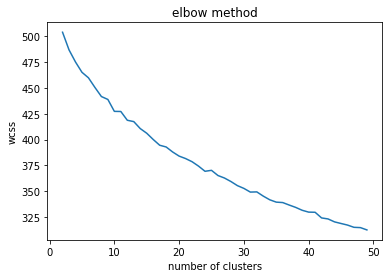

In [309]:
embeddings = np.array(topic_model.topic_embeddings_)
wcss = []
for k in range(2,50):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(embeddings)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2,50), wcss)
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show

In [316]:
kmeans = KMeans(n_clusters=42)
kmeans.fit(embeddings)

KMeans(n_clusters=42)

In [317]:
kmeans.labels_

array([26, 14, 29, ..., 23, 34, 36], dtype=int32)

In [318]:
topic_model.get_document_info(docs).sample()

,Document,Topic,Name,Top_n_words,Probability,Representative_document
135306,CloseChatForm,0,0____,- - - - - - - - -,1.0,True


In [365]:
df_input_topic_prob_response_cluster.head()

,input,response_text,topic_number,topic_label,cluster,prob_wrt_topic
0,I have no clue what I am doing,I'm not sure I understand. Please try rewordin...,909,909_doing_doing wrong_havent_process,26,0.638726
1,On the portal,I'm not sure I understand. Please try rewordin...,1295,1295_portal_hewitt_loa_elink,29,0.879884
2,Are you kidding,I'm not sure I understand. Please try rewordin...,774,774_worthless_ur_talking_youre,33,0.110141
3,I am just trying to complete the info asked fo...,I'm not sure I understand. Please try rewordin...,301,301_email address_email_address_address file,4,1.000000
4,How to Take Action,I'm not sure I understand. Please try rewordin...,411,411_action_need action_act_finally,8,0.933667


In [366]:
df_input_topic_prob_response_cluster['topic_number'] = topic_model.get_document_info(docs)['Topic']
df_input_topic_prob_response_cluster['topic_label'] = topic_model.get_document_info(docs)['Name']
df_input_topic_prob_response_cluster['prob_wrt_topic'] = topic_model.get_document_info(docs)['Probability']

In [367]:
df_input_topic_prob_response_cluster.sample()

,input,response_text,topic_number,topic_label,cluster,prob_wrt_topic
131766,CloseChatForm,This information is not available yet. Is ther...,0,0____,26,1.0


In [368]:
dict_topic_cluster = dict()
topics_set = set(topics)
cluster_list = list(kmeans.labels_)
def topic_cluster(topics_set, cluster_list ):
    for i, j in zip(topics_set, cluster_list):
        dict_topic_cluster[i] = j
    return dict_topic_cluster

In [369]:
# df_input_topic_prob_response_cluster = pd.DataFrame()
# df_input_topic_prob_response_cluster['input']  = data_for_tpm['input']
# df_input_topic_prob_response_cluster['response_text'] = data_for_tpm['response_text'] 
# df_input_topic_prob_response_cluster['topic'] = topics
# df_input_topic_prob_response_cluster['prob'] = probs
# df_input_topic_prob_response_cluster['cluster'] = df_input_topic_prob_response_cluster['topic_number'].apply(topic_cluster(topics_set, cluster_list))
df_input_topic_prob_response_cluster['cluster'] = df_input_topic_prob_response_cluster['topic_number'].map(topic_cluster(topics_set, cluster_list))

In [370]:
df_input_topic_prob_response_cluster.head()

,input,response_text,topic_number,topic_label,cluster,prob_wrt_topic
0,I have no clue what I am doing,I'm not sure I understand. Please try rewordin...,909,909_doing_doing wrong_havent_process,26,0.638726
1,On the portal,I'm not sure I understand. Please try rewordin...,1295,1295_portal_hewitt_loa_elink,29,0.879884
2,Are you kidding,I'm not sure I understand. Please try rewordin...,774,774_worthless_ur_talking_youre,33,0.110141
3,I am just trying to complete the info asked fo...,I'm not sure I understand. Please try rewordin...,301,301_email address_email_address_address file,4,1.000000
4,How to Take Action,I'm not sure I understand. Please try rewordin...,411,411_action_need action_act_finally,8,0.933667


In [371]:
df_input_topic_prob_response_cluster.shape

(194069, 6)

In [372]:
# df_input_topic_prob_response_cluster = df_input_topic_prob_response_cluster.drop('prob', axis=1)

In [373]:
df_input_topic_prob_response_cluster.to_csv('input_topic_prob_response_cluster.csv')

In [ ]:
df_topics_n_topic_embedding

In [29]:
# topic_information = topic_model.get_topic_info()

# print(type(topic_information))
# print(topic_information)

In [13]:
# topic_words = topic_model.get_topic(1)

# print(topic_words)

In [14]:
# topic_model.visualize_topics()

In [15]:
# topic_model.visualize_barchart()

In [ ]:
# !pip install bertopic --index-url=https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple --trusted-host=artifactory.alight.com

In [12]:
# topic_model.visualize_documents(docs)

In [30]:
# topics_names = topic_model.get_topics()

In [31]:
# topics_names